# _Linear Regression Lab 1 — Kevin Wong_#

In [1]:
%load_ext rpy2.ipython
import rpy2.rinterface 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

**Dataset Context**

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The dataset titled bike_share.csv contains 10,886 hourly records of rental data spanning two years for the Capital Bikeshare program in Washington, D.C. This dataset contains observations from the following variables:
- season: 1 = spring, 2 = summer, 3 = fall, 4 = winter
- weather: 1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy
- temp: outdoor temperature (measured in Fahrenheit)
- humidity: relative humidity (as a percentage)
- windspeed: wind speeds (measured in miles per hour)
- count: the number of bike rentals in a given hourly period


**Importing Data in Python and R**

In [2]:
df = pd.read_csv("bike_share.csv") 
df.head(10)

,season,weather,temp,humidity,windspeed,count
0,1,1,49.712,81,0.0000,16
1,1,1,48.236,80,0.0000,40
2,1,1,48.236,80,0.0000,32
3,1,1,49.712,75,0.0000,13
4,1,1,49.712,75,0.0000,1
5,1,2,49.712,75,6.0032,1
6,1,1,48.236,80,0.0000,2
7,1,1,46.760,86,0.0000,3
8,1,1,49.712,75,0.0000,8
9,1,1,55.616,76,0.0000,14


In [3]:
%%R

df <- read.csv("bike_share.csv", header = T)
df[1:10,]

   season weather   temp humidity windspeed count
1       1       1 49.712       81    0.0000    16
2       1       1 48.236       80    0.0000    40
3       1       1 48.236       80    0.0000    32
4       1       1 49.712       75    0.0000    13
5       1       1 49.712       75    0.0000     1
6       1       2 49.712       75    6.0032     1
7       1       1 48.236       80    0.0000     2
8       1       1 46.760       86    0.0000     3
9       1       1 49.712       75    0.0000     8
10      1       1 55.616       76    0.0000    14


**Segmenting Columns**

In [4]:
# response var.
count = df["count"]

# explanatory var candidates
temp = df["temp"]
hmd = df["humidity"]
ws = df["windspeed"]

In [5]:
%%R
count <- df$count

temp <- df$temp
hmd <- df$humidity
ws <- df$windspeed

***
**A) Scatterplot EDA — Looking for linear relationships that explain hourly Bikeshare Rentals** 

**Temperature**

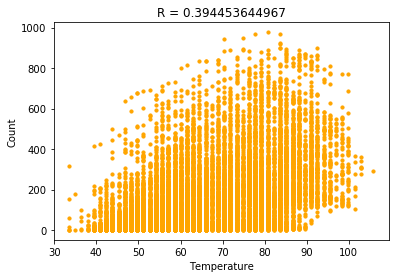

In [6]:
plt.scatter(temp, count, c="orange",s=10)
plt.xlabel("Temperature")
plt.ylabel("Count")
temp_corr = np.corrcoef(temp, count)[1,0]
plt.title("R = " + str(temp_corr))
plt.show()

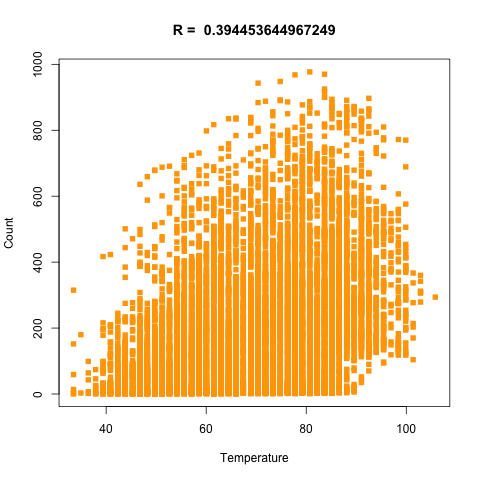

In [7]:
%%R
plot(temp, count, xlab = "Temperature", ylab = "Count", 
     main = paste("R = ",cor(temp,count)), col = "orange", pch=15)

In the above plot, we clearly see a positive relationship.  While the data is spread out, this suggests a weaker but non-negligable relationship.  The correlation coefficient confirms this observation.

**Humidity**

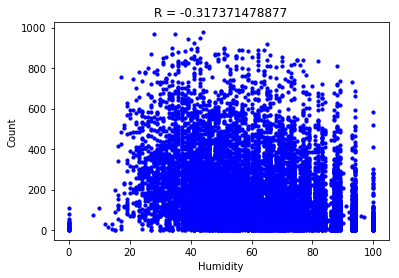

In [8]:
plt.scatter(hmd, count, c="blue",s=10)
plt.xlabel("Humidity")
plt.ylabel("Count")
hmd_corr = np.corrcoef(hmd, count)[1,0]
plt.title("R = " + str(hmd_corr))
plt.show()

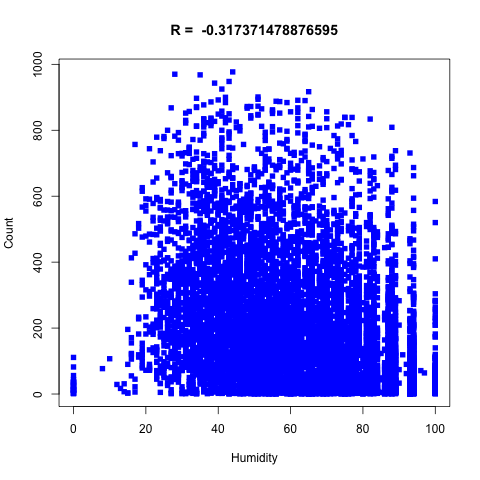

In [9]:
%%R
plot(hmd, count, xlab = "Humidity", ylab = "Count", 
     main = paste("R = ",cor(hmd,count)), col = "blue", pch=15)

Above, we observe a less clear, but still defined, negative linear relationship between humidity and count. It is more globular than clustered on a line, so it is even weaker than the previous relationship.

**Windspeed**

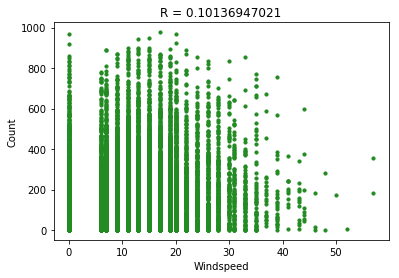

In [10]:
plt.scatter(ws, count, c="forestgreen",s=10)
plt.xlabel("Windspeed")
plt.ylabel("Count")
ws_corr = np.corrcoef(ws, count)[1,0]
plt.title("R = " + str(ws_corr))
plt.show()

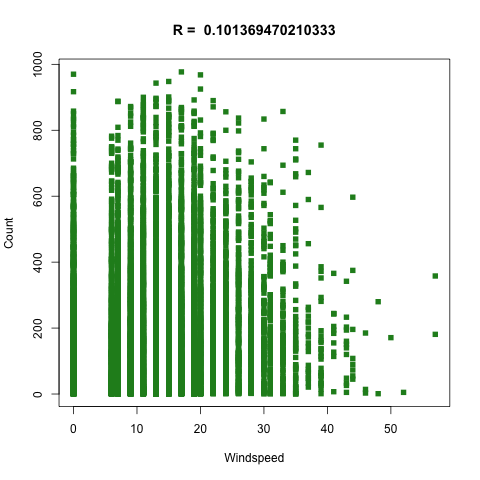

In [11]:
%%R
plot(ws, count, xlab = "Windspeed", ylab = "Count", 
     main = paste("R = ",cor(ws,count)), col = "forestgreen", pch=15)

The last relationship we examine is defined for a discrete explanatory variable windspeed.  There seems to be some what of a positive/rise between 5 and 20, and a decrease thereafter, so it is hard to discern a linear relation.  The calculated correlation coefficent affirms this, with an R value close to 0.  

***

**B) Calculating Lines of Best Fit**

$\hat\beta_1$ and $\hat\beta_0$ calculated estimates:

In [12]:
# derived in class
temp_beta_1 = temp_corr*np.std(count)/np.std(temp)
temp_beta_0 = np.mean(count) - temp_beta_1*np.mean(temp)

hmd_beta_1 = hmd_corr*np.std(count)/np.std(hmd)
hmd_beta_0 = np.mean(count) - hmd_beta_1*np.mean(hmd)

ws_beta_1 = ws_corr*np.std(count)/np.std(ws)
ws_beta_0 = np.mean(count) - ws_beta_1*np.mean(ws)

In [13]:
# temperature, humidity, windspeed against count
print("beta_1\t\tbeta_0")
print(temp_beta_1," ",temp_beta_0)
print(hmd_beta_1," ",hmd_beta_0)
print(ws_beta_1," ",ws_beta_0)

beta_1		beta_0
5.0947447119   -156.985617821
-2.98726857853   376.44560833
2.24905791734   162.787550335


In [14]:
%%R
temp_beta_1 <- cor(temp,count)*sd(count)/sd(temp)
temp_beta_0 <- mean(count) - temp_beta_1*mean(temp)

hmd_beta_1 <- cor(hmd,count)*sd(count)/sd(hmd)
hmd_beta_0 <- mean(count) - hmd_beta_1*mean(hmd)

ws_beta_1 <- cor(ws,count)*sd(count)/sd(ws)
ws_beta_0 <- mean(count) - ws_beta_1*mean(ws)

In [15]:
%%R
print(paste("beta_1              beta_0"))
print(paste(temp_beta_1, " ", temp_beta_0))
print(paste(hmd_beta_1, " ", hmd_beta_0))
print(paste(ws_beta_1, " ", ws_beta_0))

[1] "beta_1              beta_0"
[1] "5.09474471190347   -156.985617821294"
[1] "-2.98726857853443   376.445608330363"
[1] "2.24905791733652   162.787550335439"


***Lines of Best Fit:***


$temperature:\ y = -156.99 + 5.09x\\ 
humidity:\ y = 376.45 - 2.99x\\
windspeed:\ y = 162.79 + 2.24x$

**Validating Answers with Built in Python/R Packages**

In [16]:
exp = ["temp","hmd","ws"]
for i in exp:
    model = smf.ols("count ~ {}".format(i), data = df).fit().summary()
    print(str.upper(i),"\n", model, "\n")

TEMP 
                             OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2006.
Date:                Wed, 12 Sep 2018   Prob (F-statistic):               0.00
Time:                        00:10:59   Log-Likelihood:                -71125.
No. Observations:               10886   AIC:                         1.423e+05
Df Residuals:                   10884   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -156.9856      7.945    -19.759  

In [17]:
%%R

for(i in c(list(temp), list(hmd), list(ws))) {
    print(summary(lm(count ~ i)))
}


Call:
lm(formula = count ~ i)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.32 -112.36  -33.36   78.98  741.44 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -156.9856     7.9451  -19.76   <2e-16 ***
i              5.0947     0.1138   44.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 166.5 on 10884 degrees of freedom
Multiple R-squared:  0.1556,	Adjusted R-squared:  0.1555 
F-statistic:  2006 on 1 and 10884 DF,  p-value: < 2.2e-16


Call:
lm(formula = count ~ i)

Residuals:
    Min      1Q  Median      3Q     Max 
-375.45 -120.49  -41.86   82.15  734.73 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 376.44561    5.54494   67.89   <2e-16 ***
i            -2.98727    0.08556  -34.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 171.8 on 10884 degrees of freedom
Multiple R-squared:  0.10

***
**C) Imposing Lines of Best Fit on Scatterplots**

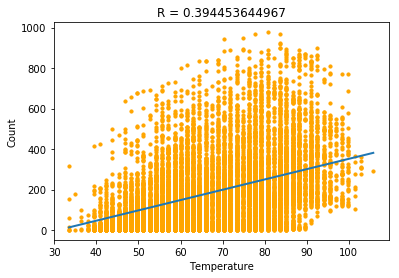

In [18]:
# manually calculate 100 evenly-spaced values of y based on the regression line formula
x_max = np.max(temp)
x_min = np.min(temp)

x_values = np.linspace(x_min, x_max, 100)
y_values = [-156.99+5.09*x for x in x_values]

plt.scatter(temp, count, c="orange", s=10)
plt.plot(x_values, y_values, lw=2)
plt.xlabel("Temperature")
plt.ylabel("Count")
temp_corr = np.corrcoef(temp, count)[1,0]
plt.title("R = " + str(temp_corr))

plt.show()

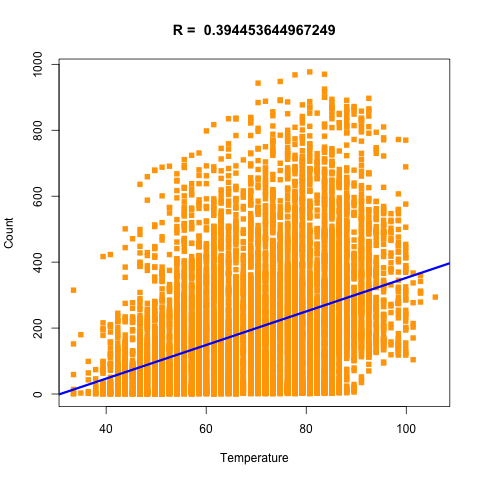

In [19]:
%%R
plot(temp, count, xlab = "Temperature", ylab = "Count", 
     main = paste("R = ",cor(temp,count)), col = "orange", pch=15)

abline(lm(count ~ temp), col = "blue", lwd = 3)

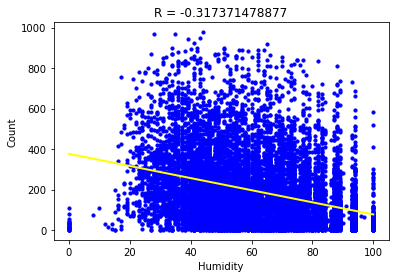

In [20]:
x_max = np.max(hmd)
x_min = np.min(hmd)

x_values = np.linspace(x_min, x_max, 100)
y_values = [376.45-2.99*x for x in x_values]

plt.scatter(hmd, count, c="blue",s=10)
plt.plot(x_values, y_values, lw=2, c="yellow")
plt.xlabel("Humidity")
plt.ylabel("Count")
hmd_corr = np.corrcoef(hmd, count)[1,0]
plt.title("R = " + str(hmd_corr))
plt.show()

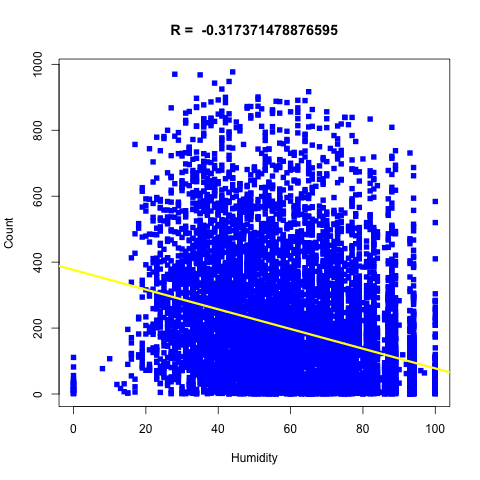

In [21]:
%%R
plot(hmd, count, xlab = "Humidity", ylab = "Count", 
     main = paste("R = ",cor(hmd,count)), col = "blue", pch=15)

abline(lm(count ~ hmd), col = "yellow", lwd = 3)

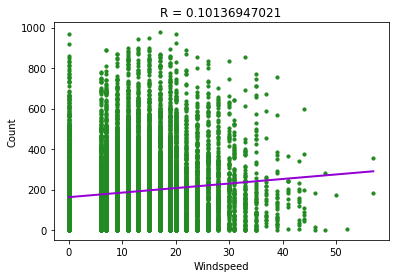

In [22]:
x_max = np.max(ws)
x_min = np.min(ws)

x_values = np.linspace(x_min, x_max, 100)
y_values = [162.79+2.24*x for x in x_values]

plt.scatter(ws, count, c="forestgreen",s=10)
plt.plot(x_values, y_values, lw=2, c="darkviolet")
plt.xlabel("Windspeed")
plt.ylabel("Count")
ws_corr = np.corrcoef(ws, count)[1,0]
plt.title("R = " + str(ws_corr))
plt.show()

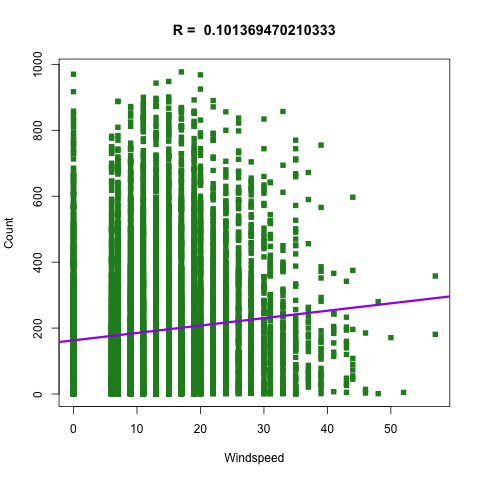

In [23]:
%%R
plot(ws, count, xlab = "Windspeed", ylab = "Count", 
     main = paste("R = ",cor(ws,count)), col = "forestgreen", pch=15)

abline(lm(count ~ ws), col = "purple", lwd = 3)

**D) Evaluating Linear Relationships**

Windspeed has the weakest linear relationship with bike rentals, followed by humidity, with temperature having the strongest relationship.  That being said, it is not a particularly strong linear relationship/model.

**E) Sample Predictions** <br>

Calculate the expected number of bike rentals in hours for which:<br>
 - the outside temperature is 70 degrees Fahrenheit<br>
 - the wind speed is 10 miles per hour<br>
 - the relative humidity is 40%

In [24]:
print("Expected Rentals at 70 degrees: ", -156.99+5.09*70)
print("Expected Rentals when the wind is at 10 mph: ", 162.79+2.24*10)
print("Expected Rentals when the relative humidity is 40%: ", round(376.45-2.99*40, 2))

Expected Rentals at 70 degrees:  199.31
Expected Rentals when the wind is at 10 mph:  185.19
Expected Rentals when the relative humidity is 40%:  256.85


**F) Alternative Inputs for Prediction**

In each of the cases above, the value of the explanatory variable lies within the range of values actually observed.  

Inputting the value of an explanatory variable outside of this observed range, one faces the risk of decreased predictive power and thus a higher chance of error.  Consider the confidence interval that can be drawn on the regression line $\hat\mu_0$, which takes on a hyperbolic shape, with the tighest bounds on the mean $\bar{x}$. The further away from $\bar{x}$ the input $x$ is, the less confident one can be in their prediction as there are fewer observed data in this region to base a prediction on as reflected in exponentially widening confidence bounds.  At some point, it becomes meaningless to make predictions far enough away from the observed range of values.
***

**G) Effect of Seasonality/Weather on Bike Rentals**

***Seasonality***


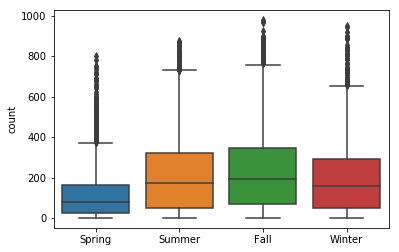

In [25]:
# list comprehension for clarity of boxplot
season = ["Spring" if s == 1 else "Summer" if s == 2 else "Fall" if s == 3 else "Winter" for s in df["season"]]

sns.boxplot(season, count)
plt.show()

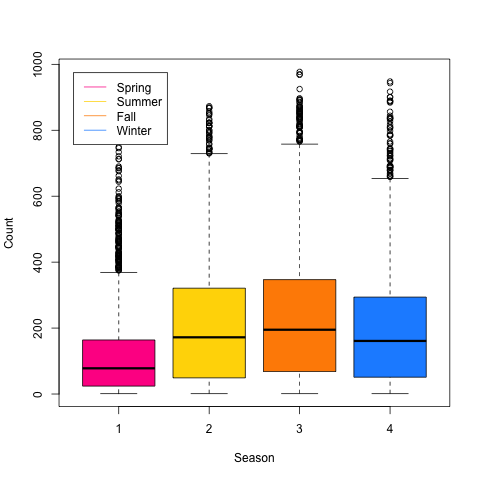

In [26]:
%%R
season <- df$season
boxplot(count~season, xlab = "Season", ylab = "Count", col=c("deeppink","gold","darkorange","dodgerblue"))
legend(.5, 975, legend=c("Spring", "Summer", "Fall", "Winter"),
       col=c("deeppink","gold","darkorange","dodgerblue"), lty=1, cex=1)

***Weather***

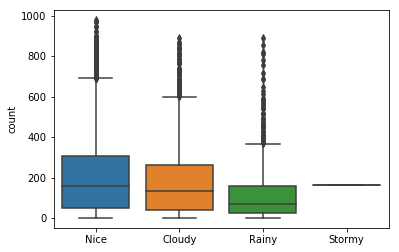

In [27]:
weather = ["Nice" if s == 1 else "Cloudy" if s == 2 else "Rainy" if s == 3 else "Stormy" for s in df["weather"]]

sns.boxplot(weather, count)
plt.show()

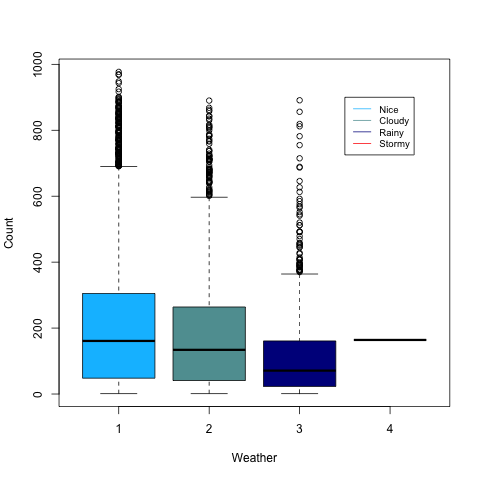

In [28]:
%%R
weather <- df$weather
boxplot(count~weather, xlab = "Weather", ylab = "Count", col=c("deepskyblue","cadetblue","blue4","red"))
legend(3.5, 900, legend=c("Nice", "Cloudy", "Rainy", "Stormy"),
       col=c("deepskyblue","cadetblue","blue4","red"), lty=1, cex=.8)

**Comments**

The boxplots lend an intuition for the dispersion of data. Seen above, Summer and Fall have higher counts of bike rentals on average than Spring (surprisingly being the least popular season) or Winter.  Because season is a categorical variable — represented numerically — it makes sense to use a boxplot to gain an understanding of the relationship between these two variables.

Considering the relationship between weather and count, the boxplots above follow the intuition that more people rent bikes in nicer weather.  In stormy weather, there is not a lot of dispersion in the recorded data.  I would assume that not many instances of stormy weather were recorded, and that on the few instances there were records, perhaps the weather changed from "bikable" weather to stormy quite suddenly.  
***

**H) Linear Regression on Seasonality and Weather**

***Seasonality***

In [29]:
model = smf.ols("count ~ season", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     298.7
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           4.76e-66
Time:                        00:11:02   Log-Likelihood:                -71898.
No. Observations:               10886   AIC:                         1.438e+05
Df Residuals:                   10884   BIC:                         1.438e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.0872      4.211     29.705      0.0

In [30]:
%%R 
summary(lm(count ~ season))


Call:
lm(formula = count ~ season)

Residuals:
    Min      1Q  Median      3Q     Max 
-230.19 -138.61  -44.90   88.86  772.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  125.087      4.211   29.70   <2e-16 ***
season        26.525      1.535   17.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 178.7 on 10884 degrees of freedom
Multiple R-squared:  0.02671,	Adjusted R-squared:  0.02662 
F-statistic: 298.7 on 1 and 10884 DF,  p-value: < 2.2e-16



The interpretation of the linear model between count and season suggests a baseline number of rentals of 125 per hour when season = 0. A season of 0 is mostly non-sensical, as there are only 4 seasons and this variable is not encoded into boolean values (ie dummified).  Moreover, the estimate for the season coefficient for slope suggests that as season increases by 1, rentals increase by 27.  Because the levels 1, 2, 3, and 4 are arbitrary and only loosely correlated to numerical meaning, this interpretation is practically useless.

***

***Weather***

In [31]:
model = smf.ols("count ~ weather", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           2.11e-41
Time:                        00:11:02   Log-Likelihood:                -71955.
No. Observations:               10886   AIC:                         1.439e+05
Df Residuals:                   10884   BIC:                         1.439e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    243.7273      4.221     57.748      0.0

In [32]:
%%R 
summary(lm(count ~ weather))


Call:
lm(formula = count ~ weather)

Residuals:
    Min      1Q  Median      3Q     Max 
-205.96 -139.96  -44.96   91.04  770.04 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  243.727      4.221   57.75   <2e-16 ***
weather      -36.768      2.717  -13.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 179.6 on 10884 degrees of freedom
Multiple R-squared:  0.01655,	Adjusted R-squared:  0.01646 
F-statistic: 183.2 on 1 and 10884 DF,  p-value: < 2.2e-16



In this case, the estimate for the intercept is 244 rentals when weather = 0.  Because there are more natural levels in this category, with 1 representing "better" weather increasing to 4 which represents "worse" weather, this value can be interpreted as baseline number of rentals on a standard good weather hour. As weather gets worse by our artificial factor of 1, we can expect a decrease of 37 rentals per incrementally worse weather category.  While imperfect, the interpretation here is slightly more useful than the seasonality interpretation.

***

**I) Further Interpretations & Suggestions**

The linear regressions carried out in the above section are generally inappropriate as $x$ is not a quantitative variable with inherent meaning that linearly scales with its increasing or decreasing value.  In both cases — season and weather — the predictor $x$ is a categorical variable that is artificially encoded into a an integer between 1 and 4 which loses value in regression analysis.  

> To demonstrate the fault of this in a more extreme case, imagine if we had said for weather that stormy is 4, nice weather is 3, cloudy is 2, and rainy is 1.  Now, what would the intercept represent?  There is no logical order to the categories in terms of assumed "pleasantness for biking" — and even so, how much does a 1-unit jump between categories really correspond to in real life?  True information is lost when encoding categorical variables in a numerical manner which don't correspond to natural levels in which the jump between levels corresponds in a 1:1 ratio to real information.  Thus, the linear regressions are inappropriate.  

_Alternative Approaches:_
- Dummify the categorical variables and use multiple linear regression, logistic regression, or a more advanced model
- Conduct linear regressions within each category based on other explanatory characteristics, and use the model corresponding to the season/weather type of interest